In [1]:
import numpy as np 
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [2]:
df = pd.read_csv('sdd.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,True,False,False,False,True,True,True,True,True,True,...,False,False,True,True,False,True,False,True,True,False
1,False,False,True,True,True,True,False,False,True,False,...,False,True,True,True,False,True,False,True,True,True
2,True,True,True,False,False,False,True,False,False,False,...,False,False,True,True,False,False,True,True,False,True
3,False,False,False,True,True,True,False,True,True,True,...,False,False,True,False,False,False,False,True,False,False
4,True,False,False,True,True,True,True,True,False,True,...,False,False,False,True,True,False,True,True,True,True


In [3]:
dft=np.transpose(df)
dft

,0,1,2,3,4
1,True,False,True,False,True
2,False,False,True,False,False
3,False,True,True,False,False
4,False,True,False,True,True
5,True,True,False,True,True
6,True,True,False,True,True
7,True,False,True,False,True
8,True,False,False,True,True
9,True,True,False,True,False
10,True,False,False,True,True


In [4]:
frequent_itemsets = fpgrowth(dft, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.64,(4)
1,0.60,(0)
2,0.48,(2)
3,0.64,(1)
4,0.48,(3)
5,0.44,"(0, 4)"
6,0.44,"(0, 1)"
7,0.40,"(1, 4)"
8,0.40,"(1, 3)"
9,0.40,"(0, 3)"


In [5]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(4),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000
1,(4),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000
2,(0),(1),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000
3,(1),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000
4,(1),(4),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000
5,(4),(1),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000
6,(1),(3),0.64,0.48,0.40,0.625000,1.302083,0.0928,1.386667
7,(3),(1),0.48,0.64,0.40,0.833333,1.302083,0.0928,2.160000
8,(0),(3),0.60,0.48,0.40,0.666667,1.388889,0.1120,1.560000
9,(3),(0),0.48,0.60,0.40,0.833333,1.388889,0.1120,2.400000


In [6]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(0),(4),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000,1,1
1,(4),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000,1,1
2,(0),(1),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000,1,1
3,(1),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000,1,1
4,(1),(4),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000,1,1
5,(4),(1),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000,1,1
6,(1),(3),0.64,0.48,0.40,0.625000,1.302083,0.0928,1.386667,1,1
7,(3),(1),0.48,0.64,0.40,0.833333,1.302083,0.0928,2.160000,1,1
8,(0),(3),0.60,0.48,0.40,0.666667,1.388889,0.1120,1.560000,1,1
9,(3),(0),0.48,0.60,0.40,0.833333,1.388889,0.1120,2.400000,1,1


In [7]:
%timeit fpgrowth(dft, min_support=0.4)

827 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


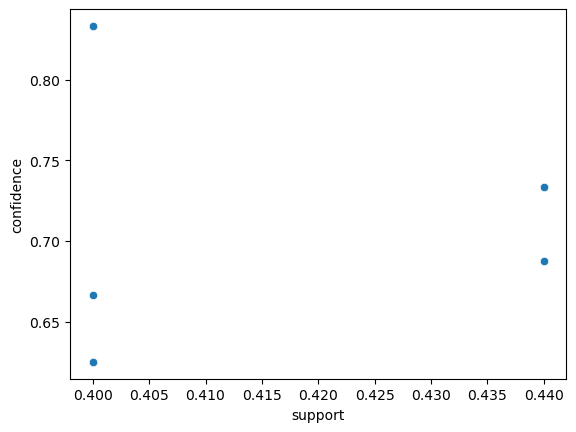

In [11]:
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

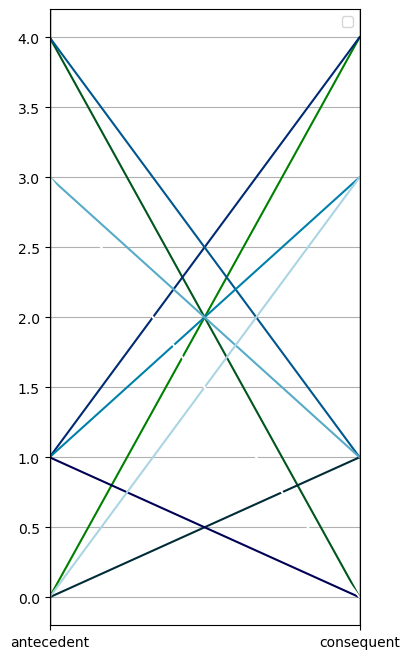

In [12]:
from pandas.plotting import parallel_coordinates
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

In [14]:
rules1 = association_rules(frequent_itemsets, metric="support", min_threshold=0.4)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(4),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000
1,(4),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000
2,(0),(1),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000
3,(1),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000
4,(1),(4),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000
5,(4),(1),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000
6,(1),(3),0.64,0.48,0.40,0.625000,1.302083,0.0928,1.386667
7,(3),(1),0.48,0.64,0.40,0.833333,1.302083,0.0928,2.160000
8,(0),(3),0.60,0.48,0.40,0.666667,1.388889,0.1120,1.560000
9,(3),(0),0.48,0.60,0.40,0.833333,1.388889,0.1120,2.400000


In [15]:
rules1["antecedent_len"] = rules1["antecedents"].apply(lambda x: len(x))
rules1["consequents_len"] = rules1["consequents"].apply(lambda x: len(x))
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(0),(4),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000,1,1
1,(4),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000,1,1
2,(0),(1),0.60,0.64,0.44,0.733333,1.145833,0.0560,1.350000,1,1
3,(1),(0),0.64,0.60,0.44,0.687500,1.145833,0.0560,1.280000,1,1
4,(1),(4),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000,1,1
5,(4),(1),0.64,0.64,0.40,0.625000,0.976562,-0.0096,0.960000,1,1
6,(1),(3),0.64,0.48,0.40,0.625000,1.302083,0.0928,1.386667,1,1
7,(3),(1),0.48,0.64,0.40,0.833333,1.302083,0.0928,2.160000,1,1
8,(0),(3),0.60,0.48,0.40,0.666667,1.388889,0.1120,1.560000,1,1
9,(3),(0),0.48,0.60,0.40,0.833333,1.388889,0.1120,2.400000,1,1


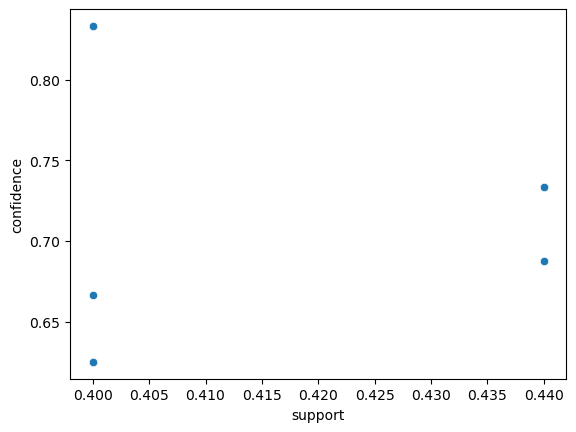

In [16]:
sns.scatterplot(x = "support", y = "confidence", data = rules1)
plt.show()

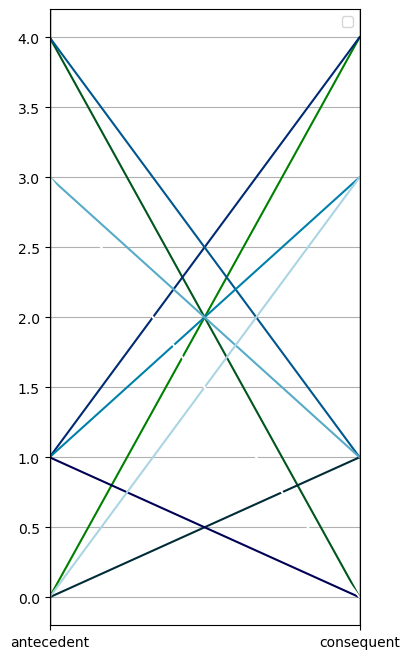

In [17]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules1)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()